# SVM and Neural Network

---

##Part 1. SVM and Neural Network for Numeric Prediction
<br>
In order for a health insurance company to make money, it needs to collect more
in yearly premiums than it spends on medical care to its beneficiaries. As a result, insurers invest a great deal of time and money in developing models that accurately forecast medical expenses for the insured population.<br>
<br>
Medical expenses are difficult to estimate because the most costly conditions are rare and seemingly random. Still, some conditions are more prevalent for certain segments of the population. For instance, lung cancer is more likely among smokers than non-smokers, and heart disease may be more likely among the obese.<br>
<br>
The goal of this analysis is to use patient data to estimate the average medical
care expenses for such population segments. These estimates can be used to create actuarial tables that set the price of yearly premiums higher or lower,
depending on the expected treatment costs.<br>
<br>
The insurance data set has 1338 observations of 7 variables.
<br>
We will use this file to predict the medical expenses.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
age:	      age in years<br>
sex:	      gender<br>
bmi:	      body mass index<br>
children:	how many children do they have?<br>
smoker:	  do they smoke?<br>
region:	  geographic region<br>
expenses:	yearly medical expenses<br>

Target variable: **expenses**

### Upload and clean data

In [36]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import preprocessing


In [38]:
# Read data
insurance = pd.read_csv("/content/drive/MyDrive/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [39]:
# Examine variable type
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [40]:
# Change categorical variables to "category"
insurance['sex'] = insurance['sex'].astype('category')
insurance['smoker'] = insurance['smoker'].astype('category')
insurance['region'] = insurance['region'].astype('category')

In [41]:
# Examine variable type
insurance.dtypes

age            int64
sex         category
bmi          float64
children       int64
smoker      category
region      category
expenses     float64
dtype: object

Text(0.5, 1.0, 'Histogram of expenses in the insurance data set')

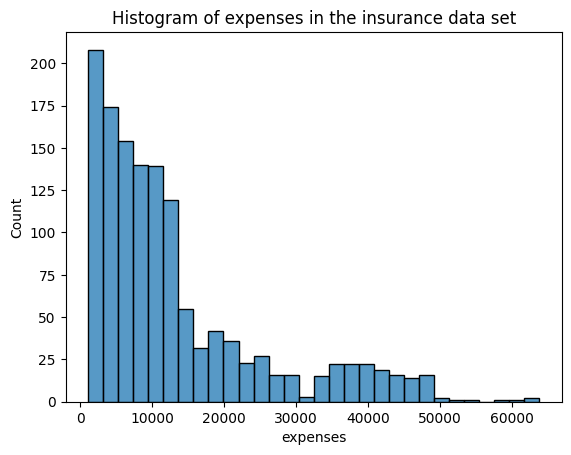

In [42]:
# Data exploration: some examples
# Histogram of insurance expenses
snsplot = sns.histplot(x='expenses', data = insurance)
snsplot.set_title("Histogram of expenses in the insurance data set")

### Partition the data set

In [43]:
# Create dummy variables
insurance = pd.get_dummies(insurance, columns=['sex','smoker','region'], drop_first=True)
insurance

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,False,True,False,False,True
1,18,33.770,1,1725.55230,True,False,False,True,False
2,28,33.000,3,4449.46200,True,False,False,True,False
3,33,22.705,0,21984.47061,True,False,True,False,False
4,32,28.880,0,3866.85520,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,True,False,True,False,False
1334,18,31.920,0,2205.98080,False,False,False,False,False
1335,18,36.850,0,1629.83350,False,False,False,True,False
1336,21,25.800,0,2007.94500,False,False,False,False,True


In [44]:
# exploring relationships among all numeric variables: correlation matrix
insurance.corr()

,age,bmi,children,expenses,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
age,1.000000,0.109272,0.042469,0.299008,-0.020856,-0.025019,-0.000407,-0.011642,0.010016
bmi,0.109272,1.000000,0.012759,0.198341,0.046371,0.003750,-0.135996,0.270025,-0.006205
children,0.042469,0.012759,1.000000,0.067998,0.017163,0.007673,0.024806,-0.023066,0.021914
expenses,0.299008,0.198341,0.067998,1.000000,0.057292,0.787251,-0.039905,0.073982,-0.043210
sex_male,-0.020856,0.046371,0.017163,0.057292,1.000000,0.076185,-0.011156,0.017117,-0.004184
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.076185,1.000000,-0.036945,0.068498,-0.036945
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.011156,-0.036945,1.000000,-0.346265,-0.320829
region_southeast,-0.011642,0.270025,-0.023066,0.073982,0.017117,0.068498,-0.346265,1.000000,-0.346265
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.004184,-0.036945,-0.320829,-0.346265,1.000000


In [45]:
# Partition the data
target = insurance['expenses']
predictors = insurance.drop(['expenses'],axis=1)
predictors_train_insurance, predictors_test_insurance, target_train_insurance, target_test_insurance = train_test_split(predictors, target, test_size=0.3, random_state=0)
print(predictors_train_insurance.shape, predictors_test_insurance.shape, target_train_insurance.shape, target_test_insurance.shape)

(936, 8) (402, 8) (936,) (402,)


Text(0.5, 1.0, 'Histogram of expenses in the training data set')

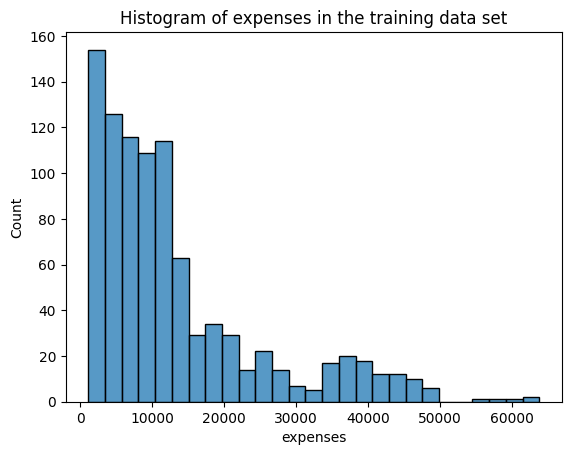

In [46]:
# Examine the distribution of target variable for training data set
snsplot = sns.histplot(data = target_train_insurance)
snsplot.set_title("Histogram of expenses in the training data set")

Text(0.5, 1.0, 'Histogram of expenses in the testing data set')

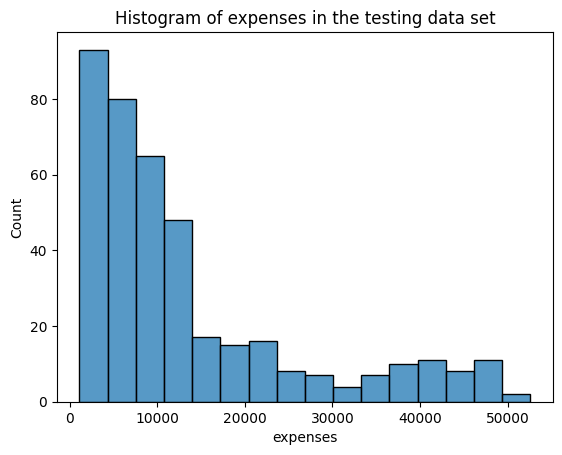

In [47]:
# Examine the distribution of target variable for testing data set
snsplot = sns.histplot(data = target_test_insurance)
snsplot.set_title("Histogram of expenses in the testing data set")

### SVM model

In [48]:
# Build a SVM model with default setting (C = 1.0)
model_SVM1 = SVR()
model_SVM1.fit(predictors_train_insurance, target_train_insurance)

SVR()

In [49]:
# Make predictions on testing data
prediction_on_test_insurance = model_SVM1.predict(predictors_test_insurance)

In [50]:
# Examine the evaluation results on testing data: MAE and RMSE
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 8674.694535379573
RMSE: 13175.419792844452


In [51]:
# Build a SVM model with C = 10.0
model_SVM2 = SVR(C = 10.0)
model_SVM2.fit(predictors_train_insurance, target_train_insurance)

SVR(C=10.0)

In [52]:
# Make predictions on testing data (0.5 points)
prediction_on_test_insurance = model_SVM1.predict(predictors_test_insurance)

In [53]:
# Examine the evaluation results on testing data: MAE and RMSE (0.5 points)
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 8674.694535379573
RMSE: 13175.419792844452


In [54]:
# Build a SVM model with C = 100.0 (0.5 points)
model_SVM2 = SVR(C = 100.0)
model_SVM2.fit(predictors_train_insurance, target_train_insurance)

SVR(C=100.0)

In [55]:
# Make predictions on testing data (0.5 points)
prediction_on_test_insurance = model_SVM2.predict(predictors_test_insurance)

In [56]:
# Examine the evaluation results on testing data: MAE and RMSE (0.5 points)
MAE = mean_absolute_error(target_test_insurance, prediction_on_test_insurance)
RMSE = mean_squared_error(target_test_insurance, prediction_on_test_insurance, squared=False)
print("MAE:", MAE)
print("RMSE:", RMSE)

MAE: 6999.127396199331
RMSE: 13386.13645573756


Q1. Which C value provides the best performance? (0.5 points)<br>


The C value with 100 provides the best performance as it has MAE: 6999.127396199331 RMSE: 13386.13645573756 it performs better on test as well as train set

Q2. How does the cost parameter C impact SVM model performance? (0.5 points)<br>


The cost parameter C in SVM determines how much the model prioritizes getting training points right versus having a clear separation between classes. Low C allows more misclassifications but a wider gap, potentially better for generalization. High C aims for fewer misclassifications but a narrower gap, risking overfitting. It's about finding the right balance for your data.

Q3. Assume that you will lose each dollar your model’s prediction misses due to an over-estimation or under-estimation. Which evaluation metric you should use? (0.5 points)<br>

MAE

Q4. Assume that the penalty for an erroneous prediction increases with the difference between the actual and predicted values. Which evaluation metric you should use? (0.5 points)<br>

RMSE

##Part 2. SVM and Neural Network for classification
<br>
This data set contains information of cars purchased at the Auction.
<br>
We will use this file to predict the quality of buying decisions and visualize decision processes.
<br>
<br>
VARIABLE DESCRIPTIONS:<br>
Auction: Auction provider at which the  vehicle was purchased<br>
Color: Vehicle Color<br>
IsBadBuy: Identifies if the kicked vehicle was an avoidable purchase<br>
MMRCurrentAuctionAveragePrice: Acquisition price for this vehicle in average condition as of current day<br>
Size: The size category of the vehicle (Compact, SUV, etc.)<br>
TopThreeAmericanName:Identifies if the manufacturer is one of the top three American manufacturers<br>
VehBCost: Acquisition cost paid for the vehicle at time of purchase<br>
VehicleAge: The Years elapsed since the manufacturer's year<br>
VehOdo: The vehicles odometer reading<br>
WarrantyCost: Warranty price (term=36month  and millage=36K)<br>
WheelType: The vehicle wheel type description (Alloy, Covers)<br>


Target variable: **IsBadBuy**

### Upload and clean data

In [64]:
# Import libraries
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [65]:
# Read data
car_kick = pd.read_csv("/content/drive/MyDrive/IS670_data/car_kick.csv")
car_kick

,PurchDate,VehYear,VehicleAge,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,...,WheelTypeID,WheelType,Nationality,Size,TopThreeAmericanName,BYRNO,VNZIP1,VNST,IsOnlineSale,IsBadBuy
0,1289952000,2006,4,51954,6197,7062,9605,10426,5341,6351,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,99750,32124,FL,0,0
1,1242691200,2005,4,89127,3688,4783,4483,5666,3688,4783,...,2,Covers,AMERICAN,MEDIUM,FORD,20833,78754,TX,0,0
2,1248220800,2006,3,71271,6897,8449,7949,9625,6868,8549,...,1,Alloy,AMERICAN,LARGE,GM,22916,80011,CO,0,0
3,1285718400,2008,2,83338,7878,8925,11723,13026,7801,8704,...,2,Covers,AMERICAN,LARGE,GM,23657,94544,CA,0,0
4,1237334400,2007,2,58698,8800,10091,10004,11398,7355,8543,...,1,Alloy,AMERICAN,LARGE,GM,20833,77086,TX,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,1285804800,2008,2,56072,6255,6972,9852,10567,6326,7126,...,2,Covers,AMERICAN,MEDIUM,CHRYSLER,22808,77061,TX,0,1
67207,1274918400,2004,6,94232,8359,9645,12042,13302,7505,8188,...,1,Alloy,'TOP LINE ASIAN','MEDIUM SUV',OTHER,17675,28273,NC,0,1
67208,1280448000,2004,6,79534,2805,3826,6132,6871,3106,4479,...,1,Alloy,AMERICAN,MEDIUM,GM,18880,37771,TN,0,1
67209,1285200000,2003,7,79394,4042,5296,7335,8983,3534,4732,...,2,Covers,AMERICAN,'MEDIUM SUV',GM,23657,92337,CA,0,1


In [66]:
# Select the desired columns only
desired_columns = ['Auction', 'Color', 'IsBadBuy', 'MMRCurrentAuctionAveragePrice', 'Size','TopThreeAmericanName',
'VehBCost', 'VehicleAge', 'VehOdo', 'WarrantyCost', 'WheelType']
car_kick_desired = car_kick [desired_columns]

In [67]:
# Replacing 1 with Yes and 0 with No in the target column IsBadBuy
carAuction = car_kick_desired.copy()
carAuction.loc[:, 'IsBadBuy'] = carAuction['IsBadBuy'].replace({0: 'No', 1: 'Yes'})

In [68]:
# Examine variable type
carAuction.dtypes

Auction                          object
Color                            object
IsBadBuy                         object
MMRCurrentAuctionAveragePrice     int64
Size                             object
TopThreeAmericanName             object
VehBCost                          int64
VehicleAge                        int64
VehOdo                            int64
WarrantyCost                      int64
WheelType                        object
dtype: object

In [69]:
# Change categorical variables to "category"
carAuction['Auction'] = carAuction['Auction'].astype('category')
carAuction['Color'] = carAuction['Color'].astype('category')
carAuction['IsBadBuy'] = carAuction['IsBadBuy'].astype('category')
carAuction['Size'] = carAuction['Size'].astype('category')
carAuction['TopThreeAmericanName'] = carAuction['TopThreeAmericanName'].astype('category')
carAuction['WheelType'] = carAuction['WheelType'].astype('category')

In [70]:
# Examine variable type
carAuction.dtypes

Auction                          category
Color                            category
IsBadBuy                         category
MMRCurrentAuctionAveragePrice       int64
Size                             category
TopThreeAmericanName             category
VehBCost                            int64
VehicleAge                          int64
VehOdo                              int64
WarrantyCost                        int64
WheelType                        category
dtype: object

In [71]:
# Create dummy variables
carAuction = pd.get_dummies(carAuction, columns=['Auction','Color','Size','TopThreeAmericanName','WheelType'], drop_first=True)
carAuction

,IsBadBuy,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,No,5341,6500,4,51954,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
1,No,3688,3680,4,89127,983,False,False,False,False,...,False,True,False,False,False,True,False,False,True,False
2,No,6868,7170,3,71271,1974,True,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,No,7801,7670,2,83338,2152,True,False,False,True,...,True,False,False,False,False,False,True,False,True,False
4,No,7355,7165,2,58698,1500,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,Yes,6326,6680,2,56072,1086,True,False,False,False,...,False,True,False,False,False,False,False,False,True,False
67207,Yes,7505,8265,6,94232,909,False,False,False,True,...,False,False,False,False,False,False,False,True,False,False
67208,Yes,3106,4950,6,79534,1506,False,False,False,False,...,False,True,False,False,False,False,True,False,False,False
67209,Yes,3534,5220,7,79394,3967,True,False,False,False,...,False,False,False,False,False,False,True,False,True,False


In [72]:
# Take the target and examine the porportion of target variable for each class
target = carAuction['IsBadBuy']
print(target.value_counts(normalize=True))

IsBadBuy
No     0.904539
Yes    0.095461
Name: proportion, dtype: float64


In [73]:
# Drop the target variable and put all the predictors in a new dataframe
predictors = carAuction.drop(['IsBadBuy'],axis=1)

In [74]:
# Apply minmax normalization on predictors
min_max_scaler = preprocessing.MinMaxScaler()
predictors_normalized = pd.DataFrame(min_max_scaler.fit_transform(predictors))
predictors_normalized.columns = predictors.columns
predictors_normalized

,MMRCurrentAuctionAveragePrice,VehBCost,VehicleAge,VehOdo,WarrantyCost,Auction_MANHEIM,Auction_OTHER,Color_BEIGE,Color_BLACK,Color_BLUE,...,Size_LARGE,Size_MEDIUM,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,WheelType_Covers,WheelType_Special
0,0.149516,0.147826,0.444444,0.422170,0.088687,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.103242,0.066087,0.444444,0.759037,0.074048,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.192262,0.167246,0.333333,0.597223,0.214895,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.218381,0.181739,0.222222,0.706576,0.240193,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.205896,0.167101,0.222222,0.483285,0.147527,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67206,0.177090,0.153043,0.222222,0.459488,0.088687,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67207,0.210095,0.198986,0.666667,0.805300,0.063530,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
67208,0.086949,0.102899,0.666667,0.672104,0.148380,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
67209,0.098931,0.110725,0.777778,0.670835,0.498152,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


###2. Partition the data set

In [75]:
# Partition the data
predictors_train, predictors_test, target_train, target_test = train_test_split(predictors_normalized, target, test_size=0.3, random_state=0)
print(predictors_train.shape, predictors_test.shape, target_train.shape, target_test.shape)

(47047, 38) (20164, 38) (47047,) (20164,)


In [76]:
# Taking steps to balance the train data
# Combine predictors_train and target_train into a single DataFrame
combined_train_df = pd.concat([predictors_train, target_train], axis=1)

# Separate majority and minority classes
majority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'No']
minority_df = combined_train_df[combined_train_df['IsBadBuy'] == 'Yes']
#print(len(majority_df), len(minority_df))
# Undersample the majority class randomly
undersampled_majority = majority_df.sample(n=int(1*len(minority_df)), random_state=55)

# Combine the undersampled majority class and the minority class
undersampled_data = pd.concat([undersampled_majority, minority_df])

# Shuffle the combined DataFrame to ensure randomness
balanced_data = undersampled_data.sample(frac=1, random_state=1)

# Split the balanced_data into predictors_train and target_train
predictors_train = balanced_data.drop(columns=['IsBadBuy'])
target_train = balanced_data['IsBadBuy']

In [77]:
# Examine the porportion of target variable for training data set
print(target_train.value_counts(normalize=True))

IsBadBuy
No     0.5
Yes    0.5
Name: proportion, dtype: float64


In [78]:
# Examine the porportion of target variable for testing data set
print(target_test.value_counts(normalize=True))

IsBadBuy
No     0.900962
Yes    0.099038
Name: proportion, dtype: float64


### SVM model

In [79]:
# Build a SVM model with default setting (C = 1.0) (0.5 points)
model_SVM1 = SVC()
model_SVM1.fit(predictors_train, target_train)

SVC()

In [80]:
# Make predictions on testing data (0.5 points)
prediction_on_test = model_SVM1.predict(predictors_test)

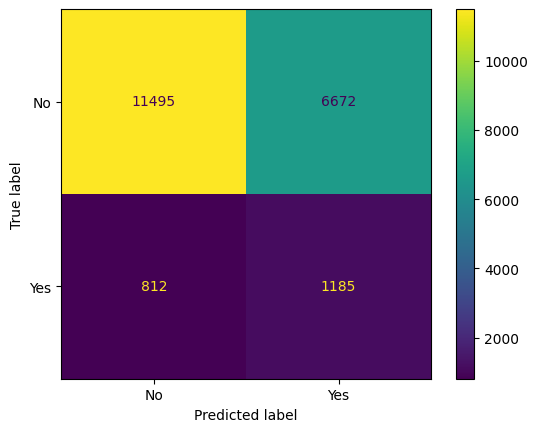

In [81]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 points)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_SVM1.classes_).plot()

In [82]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 points)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.63      0.75     18167
         Yes       0.15      0.59      0.24      1997

    accuracy                           0.63     20164
   macro avg       0.54      0.61      0.50     20164
weighted avg       0.86      0.63      0.70     20164



### MLP model

In [83]:
#Build MLP model contains three hidden layers: 64 hidden nodes for the first layer, 16 hidden nodes for the second layer, and 8 hidden nodes for the third layer. Set random_state=1. (0.5 points)
model_MLP3 = MLPClassifier(hidden_layer_sizes=(64,16,8), random_state=1)
model_MLP3.fit(predictors_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(64, 16, 8), random_state=1)

In [84]:
# Make predictions on testing data (0.5 points)
prediction_on_test =model_MLP3.predict(predictors_test)


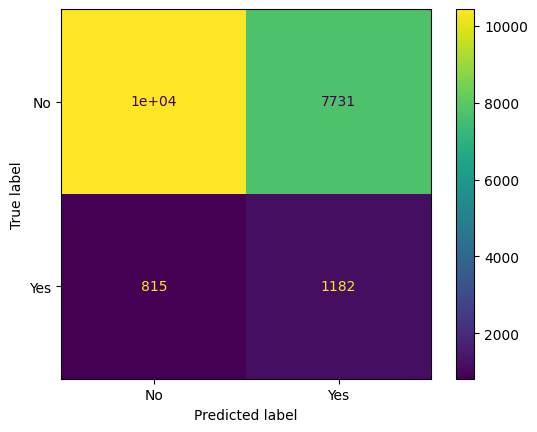

In [85]:
# Examine the evaluation results on testing data: confusion_matrix (0.5 points)
cm = confusion_matrix(target_test, prediction_on_test)
ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model_MLP3.classes_).plot()

In [86]:
# Examine the evaluation results on testing data: accuracy, precision, recall, and f1-score (0.5 points)
print(classification_report(target_test, prediction_on_test))

              precision    recall  f1-score   support

          No       0.93      0.57      0.71     18167
         Yes       0.13      0.59      0.22      1997

    accuracy                           0.58     20164
   macro avg       0.53      0.58      0.46     20164
weighted avg       0.85      0.58      0.66     20164



Q5. Which model has better performance on carAuction data, SVM or neural network? why? (0.5 points)<br>

SVM has the better performance as it has an accuracy of 63% where as MLP has lower accuracy than SVM

In [95]:
!jupyter nbconvert --to html "/content/drive/MyDrive/Insurance&Car_kicks.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/Insurance&Car_kicks.ipynb to html
[NbConvertApp] Writing 882133 bytes to /content/drive/MyDrive/Insurance&Car_kicks.html
